In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use("seaborn")

# Data Preparation

In [4]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21, 0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)

(500, 2)


# Data Visualisation

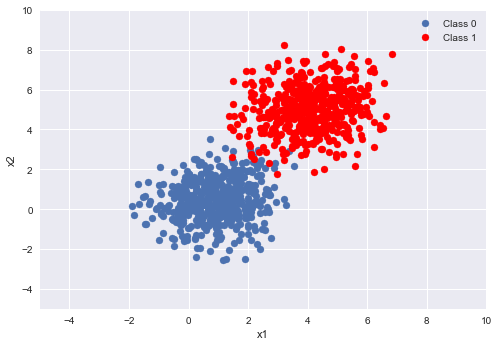

In [5]:
plt.figure(0)

plt.scatter(dist_01[:,0], dist_01[:,1], label='Class 0')
plt.scatter(dist_02[:,0], dist_02[:,1], label='Class 1', color='r')

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# Creating Training and Testing Set

In [6]:
data = np.zeros((1000,3))
data[:500, :2] = dist_01
data[500:, :2] = dist_02
data[500:, -1] = 1.0

In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 3.93202484  2.91124615  1.        ]
 [-0.23635603  1.10253723  0.        ]
 [ 4.52985621  4.95972773  1.        ]
 [ 4.71779596  4.14072133  1.        ]
 [-0.29866073  0.95907768  0.        ]
 [ 0.6603112  -0.83092811  0.        ]
 [ 1.42559522  0.90282699  0.        ]
 [ 4.04808583  5.78391007  1.        ]
 [-0.99674458  1.23552266  0.        ]
 [ 0.28056508  0.41123031  0.        ]]


In [8]:
split = int(0.8*data.shape[0])

In [9]:
X_train = data[:split, :2]
X_test = data[split:, :2]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


# Logistic Regression

In [10]:
def hypothesis(x, theta, b):
    h = np.dot(x, theta) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true, x, w, b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    return -err/m

def get_gradient(y_true, x, w, b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        grad_w += (y_true[i] - hx)*x[i]
        grad_b += (y_true[i] - hx)
        
    grad_w /= m
    grad_b /= m
    return [grad_w, grad_b]

def gradient_descent(y_true, x, w, b, learning_rate=0.1):
    err = error(y_true, x, w, b)
    grad_w, grad_b = get_gradient(y_true, x, w, b)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err, w, b

def predict(x,w,b):   
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [18]:
loss = []
acc = []
w = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [12]:
for i in range(100):
    l, w, b = gradient_descent(Y_train, X_train, w, b, learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,w,b))
    loss.append(l)

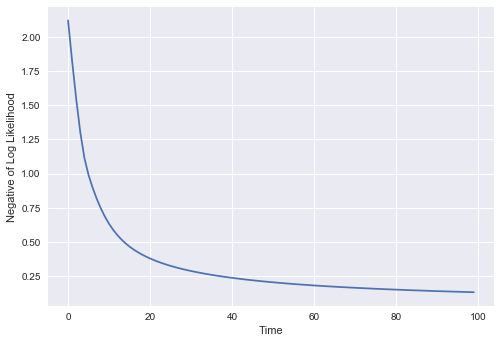

In [13]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

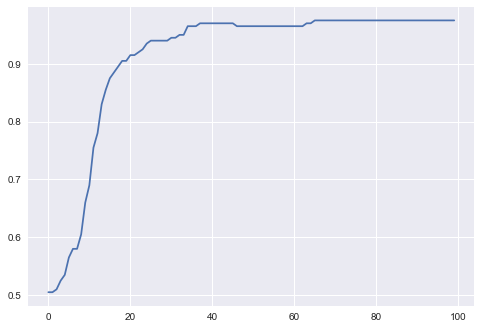

[0.505, 0.505, 0.51, 0.525, 0.535, 0.565, 0.58, 0.58, 0.605, 0.66, 0.69, 0.755, 0.78, 0.83, 0.855, 0.875, 0.885, 0.895, 0.905, 0.905, 0.915, 0.915, 0.92, 0.925, 0.935, 0.94, 0.94, 0.94, 0.94, 0.94, 0.945, 0.945, 0.95, 0.95, 0.965, 0.965, 0.965, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.965, 0.97, 0.97, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]


In [14]:
plt.plot(acc)
plt.show()
print(acc)

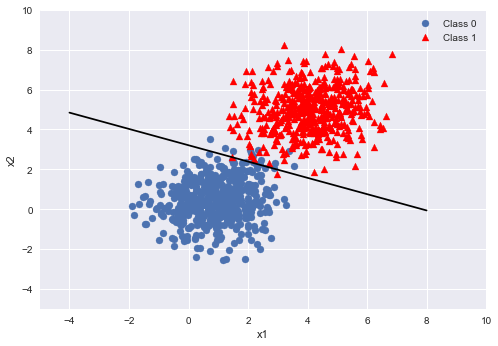

In [15]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(w[0]*x + b)/w[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()